# Locating the International Space Station

Using the <a href = "http://open-notify.org/Open-Notify-API/ISS-Location-Now/" target = "_blank">Open-notify</a> API, this notebook maps the location of the ISS.
<p>Project source from YouTube Channel <a href = "https://www.youtube.com/watch?v=R6CCTuHast0" target = "_blank">'Python Programmer'</a></p>

In [5]:
import pandas as pd
import plotly.express as px
import requests
from requests.exceptions import HTTPError

In [6]:
def get_request():
    url = "http://api.open-notify.org/iss-now.json"

    try:
        response = requests.get(url)
        # Check the status of the reponse, if succesful no Exception will be raised.
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
        return None
    except Exception as err:
        print(f'An error as occurred: {err}')
        return None
    else:
        # print("Request succesful.")
        return response.json()

In [7]:
def check_iss():
    js = get_request()
    global iss_df
    if js:
        df = pd.DataFrame([[pd.to_datetime(js['timestamp'], unit = 's'),
                           float(js['iss_position']['latitude']),
                           float(js['iss_position']['longitude'])]],
                      columns = ['timestamp','latitude','longitude'])
        
        iss_df = pd.concat([iss_df, df], ignore_index = True)

In [29]:
import time

iss_df = pd.DataFrame(columns = ['timestamp', 'latitude', 'longitude'])
start_time = time.time()
while(time.time() - start_time < 1200):
    check_iss()
    time.sleep(60)

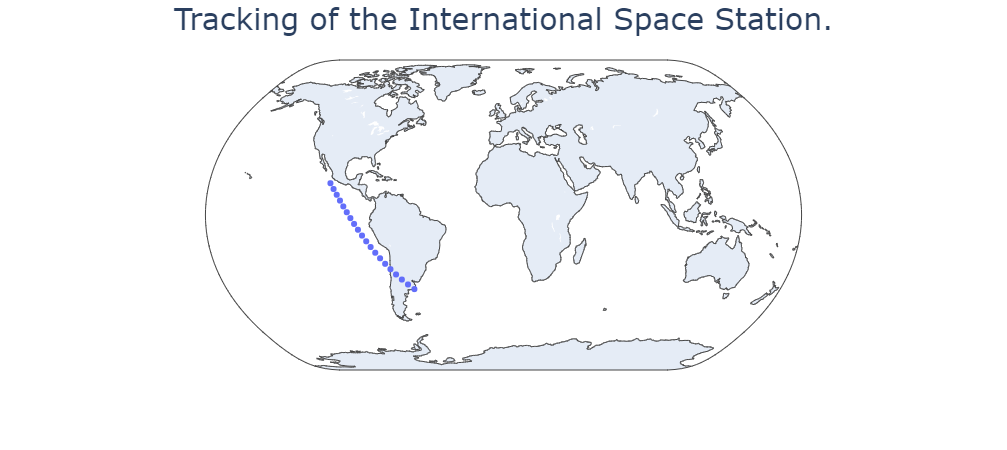

In [32]:
fig = px.scatter_geo(iss_df, lat = 'latitude', lon = 'longitude',
                    hover_name = 'timestamp',
                    projection = 'natural earth')
fig.update_layout(title_text=f"Tracking of the International Space Station.",
                  title_font_size=30,
                  title_x = 0.5,
                  title_xanchor = 'center')
fig.write_html('ISS_tracking.html')
fig.show()